In [1]:
!nvidia-smi


Sun Dec 22 18:01:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
# Move the kaggle.json file to the correct location
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the file
os.chmod('/root/.kaggle/kaggle.json', 600)
!pip install kaggle  # Install Kaggle API

# Download the dataset using Kaggle API
!kaggle datasets download -d andrewmvd/ct-low-dose-reconstruction


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ct-low-dose-reconstruction
License(s): other
100% 18.3G/18.3G [04:03<00:00, 153MB/s]
100% 18.3G/18.3G [04:03<00:00, 81.0MB/s]


In [3]:
import zipfile

zip_file_path = '/content/ct-low-dose-reconstruction.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()
    for file in all_files:
        print(file)
import zipfile
import os

zip_file_path = 'ct-low-dose-reconstruction.zip'
target_directory = 'Preprocessed_512x512/'
extract_to_path = 'CT Low Dose Reconstruction'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    all_files = zip_ref.namelist()

    filtered_files = [f for f in all_files if f.startswith(target_directory)]

    if not filtered_files:
        print("No files found in the specified directory inside the zip.")
    else:
        for file in filtered_files:
            zip_ref.extract(file, extract_to_path)
        print(f"Extracted {len(filtered_files)} files to {extract_to_path}.")



Streaming output truncated to the last 5000 lines.
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0285.2015.12.22.20.46.00.71702.358803296.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0286.2015.12.22.20.46.00.71702.358803320.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0287.2015.12.22.20.46.00.71702.358803344.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0288.2015.12.22.20.46.00.71702.358803368.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0289.2015.12.22.20.46.00.71702.358803392.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0290.2015.12.22.20.46.00.71702.358803416.png
Preprocessed_512x512/512/Quarter Dose/1mm/Soft Kernel (B30)/L506/L506_QD_1_1.CT.0004.0291.2015.12.22.20.46.00.71702.358803440.png
Preprocessed_512x512/512/Quarter Dose/1

In [4]:
import os

directory_path = '/content/CT Low Dose Reconstruction/Preprocessed_512x512'

for root, dirs, files in os.walk(directory_path):
    if files:
        print(f"Folder: {root}")
        for file in files[:1]:
            print(f"  {file}")
        print("-" * 50)


Folder: /content/CT Low Dose Reconstruction/Preprocessed_512x512/512/Full Dose/3mm/Soft Kernel (B30)/L310
  L310_FD_3_1.CT.0002.0154.2015.12.22.18.06.56.417912.358121766.png
--------------------------------------------------
Folder: /content/CT Low Dose Reconstruction/Preprocessed_512x512/512/Full Dose/3mm/Soft Kernel (B30)/L286
  L286_FD_3_1.CT.0002.0148.2015.12.22.18.22.49.651226.358224514.png
--------------------------------------------------
Folder: /content/CT Low Dose Reconstruction/Preprocessed_512x512/512/Full Dose/3mm/Soft Kernel (B30)/L096
  L096_FD_3_1.CT.0004.0281.2015.12.23.16.35.57.901651.360770200.png
--------------------------------------------------
Folder: /content/CT Low Dose Reconstruction/Preprocessed_512x512/512/Full Dose/3mm/Soft Kernel (B30)/L109
  L109_FD_3_1.CT.0002.0012.2015.12.23.17.55.27.645473.125781324.png
--------------------------------------------------
Folder: /content/CT Low Dose Reconstruction/Preprocessed_512x512/512/Full Dose/3mm/Soft Kernel (B30)

In [5]:
!pip install torch-fidelity


In [6]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.9 MB/s eta 0:00:00


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 869ms/step - loss: 0.5726 - mae: 0.2242 - mse: 0.0917 - val_loss: 0.5865 - val_mae: 0.2299 - val_mse: 0.0912
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0749 - mae: 0.0673 - mse: 0.0083 - val_loss: 0.5799 - val_mae: 0.2158 - val_mse: 0.0834
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0472 - mae: 0.0329 - mse: 0.0019 - val_loss: 0.5739 - val_mae: 0.1995 - val_mse: 0.0733
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0235 - mae: 0.0205 - mse: 9.0427e-04 - val_loss: 0.5669 - val_mae: 0.1857 - val_mse: 0.0638
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.0153 - mae: 0.0193 - mse: 7.2928e-04 - val_loss: 0.5615 - val_mae: 0.1789 - val_mse: 0.0592
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 0.0113 - mae: 0.0152 - mse: 4.3446e-04 - val_loss: 0.5519 - val_mae: 0.1721 - val_mse: 0.0546
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0098 - mae: 0.0173 - mse: 5.3027

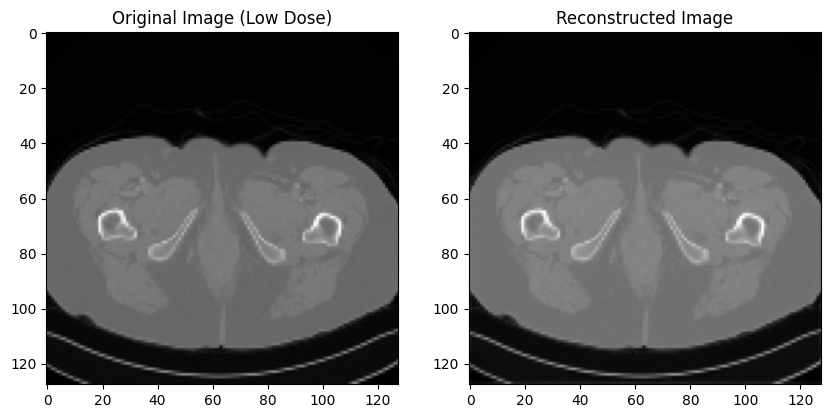

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.image import ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    return img

def build_unet(input_shape=(128, 128, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)

    # Bottleneck
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = tf.keras.layers.BatchNormalization()(conv5)

    # Decoder
    up1 = UpSampling2D((2, 2))(conv5)
    deconv1 = Conv2D(512, (3, 3), activation='relu', padding='same')(up1)
    merge1 = concatenate([conv4, deconv1])
    deconv1 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge1)

    up2 = UpSampling2D((2, 2))(deconv1)
    deconv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(up2)
    merge2 = concatenate([conv3, deconv2])
    deconv2 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge2)

    up3 = UpSampling2D((2, 2))(deconv2)
    deconv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(up3)
    merge3 = concatenate([conv2, deconv3])
    deconv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge3)

    up4 = UpSampling2D((2, 2))(deconv3)
    deconv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    merge4 = concatenate([conv1, deconv4])
    deconv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge4)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(deconv4)
    model = Model(inputs, outputs)
    return model


# SSIM Loss Function
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(ssim(y_true, y_pred, max_val=1.0))

# Prepare Data
def prepare_data(data_path, num_samples=500):
    images = []
    for root, dirs, files in os.walk(data_path):
        for file in files[:num_samples]:
            if file.endswith('.png'):
                img_path = os.path.join(root, file)
                images.append(load_image(img_path))
    return np.array(images)

# Load Data
data_path = "/content/CT Low Dose Reconstruction/Preprocessed_512x512/"
images = prepare_data(data_path)
X_train = images[:80]
X_test = images[80:]

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

model = build_unet()
model.compile(optimizer='adam', loss=ssim_loss, metrics=['mae', 'mse'])

model.fit(X_train, X_train, epochs=100, batch_size=8, validation_split=0.1)

test_image = X_test[0]
predicted_image = model.predict(test_image[np.newaxis, ...])[0]
# Visualize Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image (Low Dose)")
plt.imshow(test_image.squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(predicted_image.squeeze(), cmap='gray')
plt.show()


In [2]:
# Evaluation Metrics
def evaluate_metrics(original, reconstructed):
    if len(original.shape) == 2:
        original = original[..., np.newaxis]
    if len(reconstructed.shape) == 2:
        reconstructed = reconstructed[..., np.newaxis]

    original = tf.convert_to_tensor(original, dtype=tf.float64)
    reconstructed = tf.convert_to_tensor(reconstructed, dtype=tf.float64)

    ssim_value = ssim(original, reconstructed, max_val=1.0).numpy()

    psnr_value = psnr(tf.squeeze(original).numpy(), tf.squeeze(reconstructed).numpy(), data_range=1.0)

    return ssim_value, psnr_value

ssim_value, psnr_value = evaluate_metrics(test_image, predicted_image)
print(f"SSIM: {ssim_value:.4f}")
print(f"PSNR: {psnr_value:.2f} dB")


SSIM: 0.9986
PSNR: 40.83 dB
